In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for available styles
available_styles = plt.style.available

# Use 'seaborn' if available, otherwise use 'ggplot'
style_to_use = 'seaborn' if 'seaborn' in available_styles else 'ggplot'
plt.style.use(style_to_use)

# Other imports
import numpy as np
import pandas as pd
import pandas_ta as ta
import math
import datetime as dt
import keras_tuner as kt
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

import warnings
warnings.filterwarnings('ignore')

import gc
gc.collect()

23660

In [87]:
# Fetching data for Reliance using yfinance
import yfinance as yf
data = yf.download('HDFCBANK.NS', start='2015-01-01', end=date.today().strftime('%Y-%m-%d'))
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,475.500000,477.200012,472.524994,476.024994,440.343445,1772470
2015-01-02,475.200012,484.649994,475.200012,482.649994,446.471832,2950192
2015-01-05,485.000000,485.274994,477.549988,478.575012,442.702240,2398000
2015-01-06,477.000000,478.274994,468.774994,471.125000,435.810699,4109840
2015-01-07,469.850006,475.674988,468.125000,472.500000,437.082642,2873056
...,...,...,...,...,...,...
2024-06-04,1557.000000,1559.000000,1454.000000,1483.150024,1483.150024,44765620
2024-06-05,1494.050049,1559.599976,1482.349976,1551.800049,1551.800049,40815825
2024-06-06,1564.900024,1565.449951,1546.599976,1559.699951,1559.699951,23211435


In [88]:
data.reset_index(inplace=True)
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,475.500000,477.200012,472.524994,476.024994,440.343445,1772470
1,2015-01-02,475.200012,484.649994,475.200012,482.649994,446.471832,2950192
2,2015-01-05,485.000000,485.274994,477.549988,478.575012,442.702240,2398000
3,2015-01-06,477.000000,478.274994,468.774994,471.125000,435.810699,4109840
4,2015-01-07,469.850006,475.674988,468.125000,472.500000,437.082642,2873056
...,...,...,...,...,...,...,...
2323,2024-06-04,1557.000000,1559.000000,1454.000000,1483.150024,1483.150024,44765620
2324,2024-06-05,1494.050049,1559.599976,1482.349976,1551.800049,1551.800049,40815825
2325,2024-06-06,1564.900024,1565.449951,1546.599976,1559.699951,1559.699951,23211435
2326,2024-06-07,1561.050049,1584.349976,1552.050049,1573.349976,1573.349976,18356108


In [89]:
## Simple Moving Average
data['SMA Close (F)']= ta.sma(data["Close"], length= 21)
data['SMA Close (M)']= ta.sma(data['Close'], length= 75)
data['SMA Close (S)']= ta.sma(data['Close'], length= 150)


## Exponential Moving Average
data['EMA Close (F)']= ta.ema(data["Close"], length= 21)
data['EMA Close (M)']= ta.ema(data['Close'], length= 75)
data['EMA Close (S)']= ta.ema(data['Close'], length= 150)


## Double Exponential Moving Average
data['DEMA Close (F)']= ta.dema(data["Close"], length= 21)
data['DEMA Close (M)']= ta.dema(data['Close'], length= 75)
data['DEMA Close (S)']= ta.dema(data['Close'], length= 150)


## Triple Exponential Movng Average
data['TEMA Close (F)']= ta.tema(data["Close"], length= 21)
data['TEMA Close (M)']= ta.tema(data['Close'], length= 75)
data['TEMA Close (S)']= ta.tema(data['Close'], length= 150)


## Kaufman Adaptive Moving Average
data['KAMA Close (F)']= ta.kama(data["Close"], length= 21)
data['KAMA Close (M)']= ta.kama(data['Close'], length= 75)
data['KAMA Close (S)']= ta.kama(data['Close'], length= 150)

## MACD
macdClose= ta.macd(data['Close'])

## Bollinger Bands
bbandsClose= ta.bbands(data['Close'])

## Momentum
data['Momentum Close']= ta.mom(data['Close'])

## Relative Strength Index
data['RSI Close']= ta.rsi(data['Close'], period= 14)

## True Range
data['TrueRange']= ta.true_range(data['High'], data['Low'], data['Close'])

## Avrerage True Range
data['AvgTrueRange']= ta.atr(data['High'], data['Low'], data['Close'])

In [90]:
bbandsCloseNames= {'BBL_5_2.0' : 'CloseLower', 
                   'BBM_5_2.0' : 'CloseMid', 
                   'BBU_5_2.0' : 'CloseUpper', 
                   'BBB_5_2.0' : 'CloseBandwidth', 
                   'BBP_5_2.0' : 'Close%Columns'}

for i in bbandsClose.columns:
    data[i]= bbandsClose[i]
data.rename(columns= bbandsCloseNames, inplace= True)

In [91]:
macdCloseNames= {'MACD_12_26_9': 'MACDClose', 
                 'MACDh_12_26_9': 'HistClose', 
                 'MACDs_12_26_9': 'SignalClose'}

for i in macdClose.columns:
    data[i]= macdClose[i]
data.rename(columns= macdCloseNames, inplace= True)

In [92]:
## Simple Return
data['CloseR']= data['Close']/data['Close'].shift(-1) ## target feature we want to predict
data['OpenR']= data['Open']/data['Open'].shift(-1)
data['HighR']= data['High']/data['High'].shift(-1)
data['LowR']= data['Low']/data['Low'].shift(-1)

## Lagged Return Calculations
data['CloseR (2)']= data['Close']/data['Close'].shift(-2)
data['OpenR (2)']= data['Open']/data['Open'].shift(-2)
data['HighR (2)']= data['High']/data['High'].shift(-2)
data['LowR (2)']= data['Low']/data['Low'].shift(-2)

data['CloseR (3)']= data['Close']/data['Close'].shift(-3)
data['OpenR (3)']= data['Open']/data['Open'].shift(-3)
data['HighR (3)']= data['High']/data['High'].shift(-3)
data['LowR (3)']= data['Low']/data['Low'].shift(-3)

data['CloseR (2/3)']= data['Close'].shift(-2)/data['Close'].shift(-3)
data['OpenR (2/3)']= data['Open'].shift(-2)/data['Open'].shift(-3)
data['HighR (2/3)']= data['High'].shift(-2)/data['High'].shift(-3)
data['LowR (2/3)']= data['Low'].shift(-2)/data['Low'].shift(-3)


data['CloseR (4)']= data['Close']/data['Close'].shift(-4)
data['OpenR (4)']= data['Open']/data['Open'].shift(-4)
data['HighR (4)']= data['High']/data['High'].shift(-4)
data['LowR (4)']= data['Low']/data['Low'].shift(-4)

data['CloseR (5)']= data['Close']/data['Close'].shift(-5)
data['OpenR (5)']= data['Open']/data['Open'].shift(-5)
data['HighR (5)']= data['High']/data['High'].shift(-5)
data['LowR (5)']= data['Low']/data['Low'].shift(-5)

data['CloseR (4/5)']= data['Close'].shift(-4)/data['Close'].shift(-5)
data['OpenR (4/5)']= data['Open'].shift(-4)/data['Open'].shift(-5)
data['HighR (4/5)']= data['High'].shift(-4)/data['High'].shift(-5)
data['LowR (4/5)']= data['Low'].shift(-4)/data['Low'].shift(-5)

data['CloseR (15)']= data['Close']/data['Close'].shift(-15)
data['OpenR (15)']= data['Open']/data['Open'].shift(-15)
data['HighR (15)']= data['High']/data['High'].shift(-15)
data['LowR (15)']= data['Low']/data['Low'].shift(-15)

data['CloseR (30)']= data['Close']/data['Close'].shift(-30)
data['OpenR (30)']= data['Open']/data['Open'].shift(-30)
data['HighR (30)']= data['High']/data['High'].shift(-30)
data['LowR (30)']= data['Low']/data['Low'].shift(-30)

data['CloseR (15/30)']= data['Close'].shift(-15)/data['Close'].shift(-30)
data['OpenR (15/30)']= data['Open'].shift(-15)/data['Open'].shift(-30)
data['HighR (15/30)']= data['High'].shift(-15)/data['High'].shift(-30)
data['LowR (15/30)']= data['Low'].shift(-15)/data['Low'].shift(-30)

data['High/Open']= data['High']/data['Open']
data['Low/Open']= data['Low']/data['Open']
data['High/Close']= data['High']/data['Close']
data['Low/Close']= data['Low']/data['Close']

data['High/Open (1)']= data['High']/data['Open'].shift(-1)
data['Low/Open (1)']= data['Low']/data['Open'].shift(-1)
data['High/Close (1)']= data['High']/data['Close'].shift(-1)
data['Low/Close (1)']= data['Low']/data['Close'].shift(-1)

data['High/Open (2)']= data['High']/data['Open'].shift(-2)
data['Low/Open (2)']= data['Low']/data['Open'].shift(-2)
data['High/Close (2)']= data['High']/data['Close'].shift(-2)
data['Low/Close (2)']= data['Low']/data['Close'].shift(-2)

data['High/Open (1/2)']= data['High'].shift(-1)/data['Open'].shift(-2)
data['Low/Open (1/2)']= data['Low'].shift(-1)/data['Open'].shift(-2)
data['High/Close (1/2)']= data['High'].shift(-1)/data['Close'].shift(-2)
data['Low/Close (1/2)']= data['Low'].shift(-1)/data['Close'].shift(-2)

data['High/Open (3)']= data['High']/data['Open'].shift(-3)
data['Low/Open (3)']= data['Low']/data['Open'].shift(-3)
data['High/Close (3)']= data['High']/data['Close'].shift(-3)
data['Low/Close (3)']= data['Low']/data['Close'].shift(-3)

data['High/Open (2/3)']= data['High'].shift(-2)/data['Open'].shift(-3)
data['Low/Open (2/3)']= data['Low'].shift(-2)/data['Open'].shift(-3)
data['High/Close (2/3)']= data['High'].shift(-2)/data['Close'].shift(-3)
data['Low/Close (2/3)']= data['Low'].shift(-2)/data['Close'].shift(-3)

data['High/Open (15)']= data['High']/data['Open'].shift(-15)
data['Low/Open (15)']= data['Low']/data['Open'].shift(-15)
data['High/Close (15)']= data['High']/data['Close'].shift(-15)
data['Low/Close (15)']= data['Low']/data['Close'].shift(-15)

data['High/Open (30)']= data['High']/data['Open'].shift(-30)
data['Low/Open (30)']= data['Low']/data['Open'].shift(-30)
data['High/Close (30)']= data['High']/data['Close'].shift(30)
data['Low/Close (30)']= data['Low']/data['Close'].shift(30)

data['High/Open (15/30)']= data['High'].shift(-15)/data['Open'].shift(-30)
data['Low/Open (15/30)']= data['Low'].shift(-15)/data['Open'].shift(-30)
data['High/Close (15/30)']= data['High'].shift(15)/data['Close'].shift(-30)
data['Low/Close (15/30)']= data['Low'].shift(-15)/data['Close'].shift(-30)

data['High/Open (30/30)']= data['High'].shift(-30)/data['Open'].shift(-30)
data['Low/Open (30/30)']= data['Low'].shift(-30)/data['Open'].shift(-30)
data['High/Close (30/30)']= data['High'].shift(-30)/data['Close'].shift(-30)
data['Low/Close (30/30)']= data['Low'].shift(-30)/data['Close'].shift(-30)

data['High/Open (35/35)']= data['High'].shift(-35)/data['Open'].shift(35)
data['Low/Open (35/35)']= data['Low'].shift(-35)/data['Open'].shift(-35)
data['High/Close (35/35)']= data['High'].shift(-35)/data['Close'].shift(-35)
data['Low/Close (35/35)']= data['Low'].shift(-35)/data['Close'].shift(-35)

data['High/Open (35/35)']= data['High'].shift(-35)/data['Open'].shift(35)
data['Low/Open (35/35)']= data['Low'].shift(-35)/data['Open'].shift(-35)
data['High/Close (35/35)']= data['High'].shift(-35)/data['Close'].shift(-35)
data['Low/Close (35/35)']= data['Low'].shift(-35)/data['Close'].shift(-35)

data['High/Open (37/40)']= data['High'].shift(-37)/data['Open'].shift(-40)
data['Low/Open (37/40)']= data['Low'].shift(-37)/data['Open'].shift(-40)
data['High/Close (37/40)']= data['High'].shift(-37)/data['Close'].shift(-40)
data['Low/Close (37/40)']= data['Low'].shift(-37)/data['Close'].shift(-40)

data['High/Open (39/40)']= data['High'].shift(-39)/data['Open'].shift(-40)
data['Low/Open (39/40)']= data['Low'].shift(-39)/data['Open'].shift(-40)
data['High/Close (39/40)']= data['High'].shift(-39)/data['Close'].shift(-40)
data['Low/Close (39/40)']= data['Low'].shift(-39)/data['Close'].shift(-40)

data['High/Open (38/40)']= data['High'].shift(-38)/data['Open'].shift(-40)
data['Low/Open (38/40)']= data['Low'].shift(-38)/data['Open'].shift(-40)
data['High/Close (38/40)']= data['High'].shift(-38)/data['Close'].shift(-40)
data['Low/Close (38/40)']= data['Low'].shift(-38)/data['Close'].shift(-40)

data['High/Open (40/40)']= data['High'].shift(-40)/data['Open'].shift(-40)
data['Low/Open (40/40)']= data['Low'].shift(-40)/data['Open'].shift(-40)
data['High/Close (40/40)']= data['High'].shift(-40)/data['Close'].shift(-40)
data['Low/Close (40/40)']= data['Low'].shift(-40)/data['Close'].shift(-40)

## Lagging Calculated Returns
data['RetClose']= data['CloseR'].shift(-1)
data['RetClose (2)']= data['CloseR'].shift(-2)
data['RetClose (3)']= data['CloseR'].shift(-3)
data['RetClose (5)']= data['CloseR'].shift(-5)
data['RetClose (6)']= data['CloseR'].shift(-6)
data['RetClose (15)']= data['CloseR'].shift(-15)
data['RetClose (20)']= data['CloseR'].shift(-20)
data['RetClose (30)']= data['CloseR'].shift(-30)
data['RetClose (35)']= data['CloseR'].shift(-35)
data['RetClose (40)']= data['CloseR'].shift(-40)


data['RetLow']= data['LowR'].shift(-1)
data['RetLow (2)']= data['LowR'].shift(-2)
data['RetLow (3)']= data['LowR'].shift(-3)
data['RetLow (5)']= data['LowR'].shift(-5)
data['RetLow (6)']= data['LowR'].shift(-6)
data['RetLow (15)']= data['LowR'].shift(-15)
data['RetLow (20)']= data['LowR'].shift(-20)
data['RetLow (30)']= data['LowR'].shift(-30)
data['RetLow (35)']= data['LowR'].shift(-35)
data['RetLow (40)']= data['LowR'].shift(-40)


data['RetHigh']= data['HighR'].shift(-1)
data['RetHigh (2)']= data['HighR'].shift(-2)
data['RetHigh (3)']= data['HighR'].shift(-3)
data['RetHigh (5)']= data['HighR'].shift(-5)
data['RetHigh (6)']= data['HighR'].shift(-6)
data['RetHigh (15)']= data['HighR'].shift(-15)
data['RetHigh (20)']= data['HighR'].shift(-20)
data['RetHigh (30)']= data['HighR'].shift(-30)
data['RetHigh (35)']= data['HighR'].shift(-35)
data['RetHigh (40)']= data['HighR'].shift(-40)


data['RetLow']= data['LowR'].shift(-1)
data['RetLow (2)']= data['LowR'].shift(-2)
data['RetLow (3)']= data['LowR'].shift(-3)
data['RetLow (5)']= data['LowR'].shift(-5)
data['RetLow (6)']= data['LowR'].shift(-6)
data['RetLow (15)']= data['LowR'].shift(-15)
data['RetLow (20)']= data['LowR'].shift(-20)
data['RetLow (30)']= data['LowR'].shift(-30)
data['RetLow (35)']= data['LowR'].shift(-35)
data['RetLow (40)']= data['LowR'].shift(-40)

data['RetOpen']= data['OpenR'].shift(-1)
data['RetOpen (2)']= data['OpenR'].shift(-2)
data['RetOpen (3)']= data['OpenR'].shift(-3)
data['RetOpen (5)']= data['OpenR'].shift(-5)
data['RetOpen (6)']= data['OpenR'].shift(-6)
data['RetOpen (15)']= data['OpenR'].shift(-15)
data['RetOpen (20)']= data['OpenR'].shift(-20)
data['RetOpen (30)']= data['OpenR'].shift(-30)
data['RetOpen (35)']= data['OpenR'].shift(-35)
data['RetOpen (40)']= data['OpenR'].shift(-40)

In [93]:
data.drop(['Date','Open', 'High', 'Low', 'Close'], axis= 1, inplace= True)
data.dropna(inplace= True)
data.reset_index(inplace= True)
data.drop(['index'], axis= 1, inplace= True)
data['TargetCloseR']= data['CloseR'].shift(-30).fillna(0)

print('CloseR Column:', data.columns.get_loc('CloseR'))
print('DataFrame Shape:', data.shape)
data

CloseR Column: 29
DataFrame Shape: (2138, 170)


,Adj Close,Volume,SMA Close (F),SMA Close (M),SMA Close (S),EMA Close (F),EMA Close (M),EMA Close (S),DEMA Close (F),DEMA Close (M),...,RetOpen (2),RetOpen (3),RetOpen (5),RetOpen (6),RetOpen (15),RetOpen (20),RetOpen (30),RetOpen (35),RetOpen (40),TargetCloseR
0,509.172485,1613570,550.992856,522.109333,519.946835,547.099534,531.290511,519.946835,553.643734,544.011070,...,1.006110,1.010585,0.985487,1.006825,1.009744,1.001199,0.988477,0.966292,0.999908,1.021637
1,510.104584,1977188,551.085714,522.697334,520.422168,547.120032,531.712472,520.309460,553.087939,544.509135,...,1.010585,0.994368,1.006825,1.006222,0.999804,1.014493,1.030269,0.993304,0.993699,0.982320
2,510.127686,1363844,551.051188,523.292333,520.853501,547.140936,532.123985,520.667612,552.585310,544.984578,...,0.994368,0.985487,1.006222,1.015777,1.016118,0.972597,0.973448,0.998143,1.006711,0.997907
3,498.827332,3002870,550.541664,523.731666,521.231168,546.057667,532.205590,520.860425,550.022307,544.807204,...,0.985487,1.006825,1.015777,1.003759,1.002794,1.011466,0.992417,0.973080,1.011296,1.004778
4,502.135925,1732526,550.085714,524.294333,521.682168,545.395609,532.378470,521.097704,548.397956,544.816793,...,1.006825,1.006222,1.003759,1.018474,1.000100,0.988664,1.022287,1.017463,1.006315,0.982720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,1460.210205,20612723,1444.378575,1515.996670,1532.052670,1447.605701,1485.195735,1522.338138,1447.885334,1433.315023,...,0.977258,0.989742,1.003194,1.019001,0.991084,1.007392,0.997311,0.995589,1.026975,0.000000
2134,1462.331299,22792193,1448.135719,1513.966004,1531.383337,1450.759733,1485.119533,1521.807832,1453.881246,1434.529906,...,0.989742,1.000064,1.019001,1.015659,1.003168,1.000033,0.994684,1.007971,1.042134,0.000000
2135,1507.020996,44467533,1452.747623,1512.588670,1530.990004,1457.745209,1486.237439,1521.884549,1466.933382,1438.067606,...,1.000064,1.003194,1.015659,1.007095,0.990714,1.017380,0.999452,1.012540,0.954726,0.000000
2136,1528.675293,29527951,1458.311913,1511.247337,1530.791671,1466.091104,1487.903560,1522.250980,1482.031165,1442.623631,...,1.003194,1.019001,1.007095,0.984899,1.004731,1.014238,0.980605,0.986965,1.002466,0.000000


In [94]:
tsdata= data
tsdata

,Adj Close,Volume,SMA Close (F),SMA Close (M),SMA Close (S),EMA Close (F),EMA Close (M),EMA Close (S),DEMA Close (F),DEMA Close (M),...,RetOpen (2),RetOpen (3),RetOpen (5),RetOpen (6),RetOpen (15),RetOpen (20),RetOpen (30),RetOpen (35),RetOpen (40),TargetCloseR
0,509.172485,1613570,550.992856,522.109333,519.946835,547.099534,531.290511,519.946835,553.643734,544.011070,...,1.006110,1.010585,0.985487,1.006825,1.009744,1.001199,0.988477,0.966292,0.999908,1.021637
1,510.104584,1977188,551.085714,522.697334,520.422168,547.120032,531.712472,520.309460,553.087939,544.509135,...,1.010585,0.994368,1.006825,1.006222,0.999804,1.014493,1.030269,0.993304,0.993699,0.982320
2,510.127686,1363844,551.051188,523.292333,520.853501,547.140936,532.123985,520.667612,552.585310,544.984578,...,0.994368,0.985487,1.006222,1.015777,1.016118,0.972597,0.973448,0.998143,1.006711,0.997907
3,498.827332,3002870,550.541664,523.731666,521.231168,546.057667,532.205590,520.860425,550.022307,544.807204,...,0.985487,1.006825,1.015777,1.003759,1.002794,1.011466,0.992417,0.973080,1.011296,1.004778
4,502.135925,1732526,550.085714,524.294333,521.682168,545.395609,532.378470,521.097704,548.397956,544.816793,...,1.006825,1.006222,1.003759,1.018474,1.000100,0.988664,1.022287,1.017463,1.006315,0.982720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,1460.210205,20612723,1444.378575,1515.996670,1532.052670,1447.605701,1485.195735,1522.338138,1447.885334,1433.315023,...,0.977258,0.989742,1.003194,1.019001,0.991084,1.007392,0.997311,0.995589,1.026975,0.000000
2134,1462.331299,22792193,1448.135719,1513.966004,1531.383337,1450.759733,1485.119533,1521.807832,1453.881246,1434.529906,...,0.989742,1.000064,1.019001,1.015659,1.003168,1.000033,0.994684,1.007971,1.042134,0.000000
2135,1507.020996,44467533,1452.747623,1512.588670,1530.990004,1457.745209,1486.237439,1521.884549,1466.933382,1438.067606,...,1.000064,1.003194,1.015659,1.007095,0.990714,1.017380,0.999452,1.012540,0.954726,0.000000
2136,1528.675293,29527951,1458.311913,1511.247337,1530.791671,1466.091104,1487.903560,1522.250980,1482.031165,1442.623631,...,1.003194,1.019001,1.007095,0.984899,1.004731,1.014238,0.980605,0.986965,1.002466,0.000000


In [10]:
## Data Preparation for RFE
X_rfe= tsdata.iloc[:,:-1]
y_rfe= tsdata['TargetCloseR']

xr_train, xr_test, yr_train, yr_test= train_test_split(X_rfe, y_rfe, test_size= 0.2, random_state= 0)

## Defining a RandomForest regression function to check the accuracy the RFE selected features
def run_RF(xr_train, xr_test, yr_train, yr_test):
    clf= RandomForestRegressor(n_estimators= 50, random_state= 0, n_jobs= -1)
    clf.fit(xr_train, yr_train)
    yr_pred= clf.predict(xr_test)
    print('Loss:', math.sqrt(mean_squared_error(yr_test, yr_pred)))

## Defining the RandomForest RFE Algorithm (25 features will be selected)
rfe= RFE(RandomForestRegressor(n_estimators= 50, random_state= 1, n_jobs= -1), n_features_to_select= 25, verbose= 1)
rfe.fit(xr_train, yr_train)
xr1_train= rfe.transform(xr_train)
xr1_test= rfe.transform(xr_test)
print('Selected Features:', 25)
run_RF(xr1_train, xr1_test, yr_train, yr_test)
print()

Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
F

In [95]:
## Selected Features
selected= np.where(rfe.support_== True)
print(selected)

for i in selected:
    print(xr_train.columns[i])
print()
print('Number of features selected:', len(selected[0]))

(array([  3,   4,   5,   6,   7,  10,  12,  13,  15,  16,  25,  30,  31,
        49,  53, 113, 114, 122, 136, 137, 143, 146, 155, 156, 165],
      dtype=int64),)
Index(['SMA Close (M)', 'SMA Close (S)', 'EMA Close (F)', 'EMA Close (M)',
       'EMA Close (S)', 'DEMA Close (S)', 'TEMA Close (M)', 'TEMA Close (S)',
       'KAMA Close (M)', 'KAMA Close (S)', 'Close%Columns', 'OpenR', 'HighR',
       'CloseR (5)', 'CloseR (4/5)', 'High/Open (37/40)', 'Low/Open (37/40)',
       'Low/Open (38/40)', 'RetClose (30)', 'RetClose (35)', 'RetLow (6)',
       'RetLow (30)', 'RetHigh (20)', 'RetHigh (30)', 'RetOpen (20)'],
      dtype='object')

Number of features selected: 25


In [96]:
selected= ['TEMA Close (M)', 'KAMA Close (F)', 'RSI Close', 'AvgTrueRange',
       'CloseLower', 'CloseBandwidth', 'Close%Columns', 'MACDClose', 'CloseR',
       'Low/Open', 'High/Open (30/30)', 'Low/Open (30/30)',
       'High/Close (30/30)', 'Low/Close (30/30)', 'Low/Close (35/35)',
       'Low/Close (39/40)', 'RetClose', 'RetClose (6)', 'RetClose (30)',
       'RetClose (40)', 'RetLow (20)', 'RetLow (30)', 'RetLow (40)',
       'RetHigh (40)', 'RetOpen (40)']
newdata= tsdata[selected]
newdata

,TEMA Close (M),KAMA Close (F),RSI Close,AvgTrueRange,CloseLower,CloseBandwidth,Close%Columns,MACDClose,CloseR,Low/Open,...,Low/Close (39/40),RetClose,RetClose (6),RetClose (30),RetClose (40),RetLow (20),RetLow (30),RetLow (40),RetHigh (40),RetOpen (40)
0,553.538678,541.614172,51.399213,9.406183,542.887908,1.236427,0.508887,3.600809,0.998173,0.995109,...,0.995633,0.999954,1.004741,1.021637,1.004293,1.000000,1.010777,1.007393,1.007014,0.999908
1,553.860119,541.650918,52.357944,9.375382,542.929059,1.194065,0.674033,3.207309,0.999954,0.993607,...,1.000231,1.022654,1.004160,0.982320,0.997192,1.003071,1.006528,0.995556,0.996073,0.993699
2,554.151731,541.679299,52.383196,9.227138,545.616928,0.511160,0.619803,2.864453,1.022654,0.990137,...,0.990103,0.993411,1.006653,0.997907,1.005183,0.972139,0.983253,1.002227,0.999544,1.006711
3,553.480952,541.547326,41.012431,9.539492,535.167047,3.550746,0.002994,1.595954,0.993411,0.980981,...,0.999676,0.977991,1.012626,1.004778,1.003902,1.008732,0.993193,1.004286,1.012337,1.011296
4,553.103290,541.497700,44.791142,9.433097,532.920907,3.712373,0.290409,0.867123,0.977991,0.990344,...,1.001347,1.009437,1.041460,0.982720,0.992256,0.989571,1.017559,1.005763,0.995996,1.006315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,1415.518107,1438.373743,60.224295,23.260776,1413.106304,5.481847,0.841757,2.728296,0.998550,0.998703,...,0.962982,0.970346,1.011455,1.003633,1.060041,0.993442,0.997311,1.066025,1.025657,1.026975
2134,1418.458439,1441.793187,60.775509,23.331435,1430.373763,4.635118,0.765056,5.005970,0.970346,0.999525,...,1.045073,0.985835,1.016224,0.999726,0.955761,1.008643,1.001347,0.980875,0.999615,1.042134
2135,1424.775187,1449.936729,70.158837,25.072043,1429.709648,7.016362,0.941609,10.347094,0.985835,1.000000,...,0.936976,1.001907,0.990359,0.977623,0.994935,1.016077,0.993892,0.958457,0.996263,0.954726
2136,1432.494866,1461.163316,73.470538,25.202613,1440.219544,8.228982,0.884544,16.164822,1.001907,0.994250,...,0.950407,0.998741,1.009734,0.983786,0.991324,1.024251,0.980518,0.996488,0.988071,1.002466


In [97]:
## Scaling the Input Data for Training and Testing
scaler= MinMaxScaler(feature_range= (0,1))
ts_scaled= scaler.fit_transform(newdata)

print('Scaled Data Shape:', np.shape(ts_scaled))
print('Scaled Length:', len(ts_scaled))
print('Scaled Data Dimensions:', ts_scaled.ndim)
ts_scaled

Scaled Data Shape: (2138, 25)
Scaled Length: 2138
Scaled Data Dimensions: 2


array([[0.05304072, 0.03484632, 0.51335322, ..., 0.53172112, 0.54750837,
        0.424464  ],
       [0.05331231, 0.03487724, 0.52658316, ..., 0.47416969, 0.50149265,
        0.40254153],
       [0.05355869, 0.03490112, 0.52693163, ..., 0.50660272, 0.5160894 ,
        0.44848294],
       ...,
       [0.78915705, 0.79915536, 0.77222549, ..., 0.29378004, 0.502292  ,
        0.26494852],
       [0.79567949, 0.80860199, 0.8179251 , ..., 0.47870152, 0.46783644,
        0.43349547],
       [0.80170487, 0.81573392, 0.80189741, ..., 0.47845065, 0.527854  ,
        0.39574177]])

In [98]:
## Scaling the prediction input data
pred_data= data[newdata.columns]
pred_data= pred_data[len(data)-30:]

pred_scaled= scaler.fit_transform(pred_data)

print('Scaled Data Shape:', np.shape(pred_scaled))
print('Scaled Length:', len(pred_scaled))
print('Scaled Data Dimensions:', pred_scaled.ndim)
pred_scaled

Scaled Data Shape: (30, 25)
Scaled Length: 30
Scaled Data Dimensions: 2


array([[1.        , 0.04847341, 0.08666459, 1.        , 0.10379687,
        0.39833939, 0.3326101 , 0.        , 0.68082023, 0.7675175 ,
        0.        , 0.70318133, 0.08805062, 0.87504852, 0.96519796,
        0.57262104, 0.67007822, 0.61670282, 0.66083932, 0.43026597,
        0.71080566, 0.57711224, 0.39052366, 0.52212067, 0.44610835],
       [0.86065745, 0.04453888, 0.09446972, 0.87358706, 0.10912647,
        0.39444641, 0.34828121, 0.03518448, 0.67007822, 0.81004898,
        0.        , 0.65311398, 0.25585334, 0.97234711, 0.        ,
        0.5612784 , 0.7338683 , 0.52307757, 0.7337745 , 0.3007188 ,
        0.48574974, 0.75294526, 0.38003088, 0.54100471, 0.57722128],
       [0.73411539, 0.04318399, 0.10790335, 0.80298881, 0.15219518,
        0.36121107, 0.35067108, 0.07196495, 0.7338683 , 1.        ,
        0.17870961, 0.84255117, 0.19780633, 0.92836471, 0.96091605,
        0.43817235, 0.87781102, 0.61992755, 0.83274171, 0.48353244,
        0.17800551, 0.78463859, 0.33496029, 0.

In [99]:
## Scaling the target data
TargetReturns= data['TargetCloseR'][:len(data)-30].values.reshape(-1,1)
scaler2= MinMaxScaler(feature_range= (0,1))
scaled2= scaler2.fit_transform(TargetReturns)

print('Scaled Data Shape:', np.shape(scaled2))
print('Scaled Length:', len(scaled2))
print('Scaled Data Dimensions:', scaled2.ndim)
scaled2

Scaled Data Shape: (2108, 1)
Scaled Length: 2108
Scaled Data Dimensions: 2


array([[0.50595854],
       [0.34754709],
       [0.4103509 ],
       ...,
       [0.36170784],
       [0.4264672 ],
       [0.41370806]])

In [100]:
## Creating a time series dataset for LSTM
days= 72
X= []

for j in range(25):
    X.append([])
    for i in range(days, len(ts_scaled)):
        X[j].append(ts_scaled[i-days:i, j])

X, yi= np.array(X), np.array(scaled2[days:, 0])
X= np.moveaxis(X, [0], [2]) 
y= np.reshape(yi, (len(yi), 1))

In [101]:
print('X Shape:', np.shape(X))
print('X Dimensions:', X.ndim)
X

X Shape: (2066, 72, 25)
X Dimensions: 3


array([[[0.05304072, 0.03484632, 0.51335322, ..., 0.53172112,
         0.54750837, 0.424464  ],
        [0.05331231, 0.03487724, 0.52658316, ..., 0.47416969,
         0.50149265, 0.40254153],
        [0.05355869, 0.03490112, 0.52693163, ..., 0.50660272,
         0.5160894 , 0.44848294],
        ...,
        [0.04109051, 0.03283528, 0.47739389, ..., 0.58454217,
         0.25058771, 0.4323658 ],
        [0.04081381, 0.03265653, 0.44596646, ..., 0.46938649,
         0.8222802 , 0.43861978],
        [0.04049299, 0.03244616, 0.43473842, ..., 0.45462401,
         0.47370498, 0.40861112]],

       [[0.05331231, 0.03487724, 0.52658316, ..., 0.47416969,
         0.50149265, 0.40254153],
        [0.05355869, 0.03490112, 0.52693163, ..., 0.50660272,
         0.5160894 , 0.44848294],
        [0.05299194, 0.03479007, 0.37002146, ..., 0.51661758,
         0.56989475, 0.46467012],
        ...,
        [0.04081381, 0.03265653, 0.44596646, ..., 0.46938649,
         0.8222802 , 0.43861978],
        [0.0

In [102]:
print('y Shape:', np.shape(y))
print('y Dimensions:', y.ndim)
y

y Shape: (2036, 1)
y Dimensions: 2


array([[0.43305461],
       [0.46361602],
       [0.36861498],
       ...,
       [0.36170784],
       [0.4264672 ],
       [0.41370806]])

In [103]:
## Splitting data (80% training, 20% testing)
split= int(len(X)* 0.8)

x_train, x_test= X[:split], X[split:]
y_train, y_test= y[:split], y[split:]

print('x_train Shape:', np.shape(x_train))
print('x_train Dimensions:', x_train.ndim)
print()
print('x_test Shape:', np.shape(x_test))
print('x_test Dimensions:', x_test.ndim)
print()
print('y_train Shape:', np.shape(y_train))
print('y_train Dimensions:', y_train.ndim)
print()
print('y_test Shape:', np.shape(y_test))
print('y_test Dimensions:', y_test.ndim)

x_train Shape: (1652, 72, 25)
x_train Dimensions: 3

x_test Shape: (414, 72, 25)
x_test Dimensions: 3

y_train Shape: (1652, 1)
y_train Dimensions: 2

y_test Shape: (384, 1)
y_test Dimensions: 2


In [104]:
## Hyperparameter Tuning
def build_model(hp):
    model= Sequential()
    for i in range(hp.Int('layers', 2, 3)):
        model.add(LSTM(units= hp.Int('units_' + str(i), 10, 200, step= 10), 
                       return_sequences= hp.Choice('ret_' + str(i), ['True', 'False']), 
                       input_shape= (x_train.shape[1], x_train.shape[2])))
        model.add(Dropout(0.1))
    model.add(Dense(units= 1, activation= hp.Choice('act_1', ['relu', 'sigmoid'])))
    

    model.compile(keras.optimizers.Adam(learning_rate= 0.01), loss= 'mean_squared_error')
    return model

tuner= RandomSearch(build_model, objective= 'loss', max_trials= 2, executions_per_trial= 2, 
                    directory= 'direct_stanbic1', project_name= 'stanbic1')

tuner.search_space_summary()

Reloading Tuner from direct_stanbic1\stanbic1\tuner0.json
Search space summary
Default search space size: 8
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
ret_0 (Choice)
{'default': 'True', 'conditions': [], 'values': ['True', 'False'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
ret_1 (Choice)
{'default': 'True', 'conditions': [], 'values': ['True', 'False'], 'ordered': False}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
ret_2 (Choice)
{'default': 'True', 'conditions': [], 'values': ['True', 'False'], 'ordered': False}


In [105]:
tuner.search(x_train, y_train, epochs= 150, batch_size= 16,
             validation_data= (x_test, y_test), validation_split= 0.2)

In [106]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
ret_0 (Choice)
{'default': 'True', 'conditions': [], 'values': ['True', 'False'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
ret_1 (Choice)
{'default': 'True', 'conditions': [], 'values': ['True', 'False'], 'ordered': False}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
ret_2 (Choice)
{'default': 'True', 'conditions': [], 'values': ['True', 'False'], 'ordered': False}


In [109]:
model= Sequential()
model.add(LSTM(units= 120, return_sequences= True, input_shape= (x_train.shape[1], x_train.shape[2]))) 
model.add(Dropout(0.1))
model.add(LSTM(units= 170, return_sequences= True, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units= 50, input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(units= 1, activation= 'relu'))

es= EarlyStopping(monitor= 'loss', min_delta= 1e-10, patience= 10, verbose= 1)
rlr= ReduceLROnPlateau(monitor= 'loss', factor= 0.5, patience= 10, verbose= 1)

model.compile(keras.optimizers.Adam(learning_rate= 0.001), loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 150, batch_size= 16, callbacks= [es, rlr], validation_split= 0.2, shuffle= True)

Epoch 1/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0232 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 2/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0042 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 3/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0058 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 4/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0053 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 5/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0048 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 6/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0047 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 7/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0041 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 8/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0046 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 9/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0043 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 10/1

Text(0.5, 1.0, 'Plot of Mean Sqaured Error per Increasing Epochs')

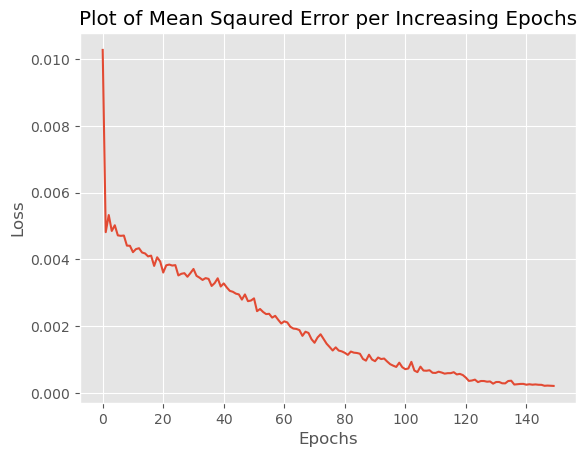

In [110]:
loss= model.history.history['loss']
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Mean Sqaured Error per Increasing Epochs')

In [111]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 72, 120)             │          70,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 72, 120)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 72, 170)             │         197,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 72, 170)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 50)                  │          44,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936,635 (3.57 MB)

 Trainable params: 312,211 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 624,424 (2.38 MB)

In [112]:
## Predicting the test data
test_predict= model.predict(x_test)

## Getting actual test values
test_predict= scaler2.inverse_transform(test_predict)
returnss= scaler2.inverse_transform(y_test)

print('(Predicted)', '(Actual)')

for i in range(100):
    print(test_predict[i], returnss[i])

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
(Predicted) (Actual)
[0.9901549] [0.99344471]
[0.99289703] [0.9880976]
[0.9991106] [1.00154772]
[1.0255458] [1.02176984]
[1.022433] [1.02755591]
[1.0106741] [1.01366838]
[1.0139215] [1.00905333]
[1.0159477] [1.01748762]
[1.0058445] [1.00520857]
[0.9752648] [0.9725613]
[1.0011655] [1.00576707]
[0.97626346] [0.97260836]
[1.0107403] [1.01113431]
[1.0126895] [1.00433321]
[1.0089314] [1.01116611]
[1.0034239] [1.01024523]
[0.99975413] [0.9935097]
[1.0073869] [1.01162462]
[0.9716447] [0.9684503]
[0.99868983] [0.99478065]
[0.9950351] [1.00187005]
[0.99325824] [0.9898536]
[1.009991] [1.00679871]
[1.0050253] [1.00709028]
[0.9882158] [0.98463429]
[1.006619] [1.00699567]
[0.9982588] [0.99759351]
[0.99373317] [0.99705222]
[0.9759495] [0.97461081]
[0.9871537] [0.98906324]
[1.0011435] [0.99937264]
[1.0108665] [1.00441107]
[1.0092993] [1.00694655]
[0.99198127] [0.99227862]
[1.0018044] [1.00029839]
[0.98949486] [0.98924412]
[0.95228297] [0.94637369]
[0.99617624] 

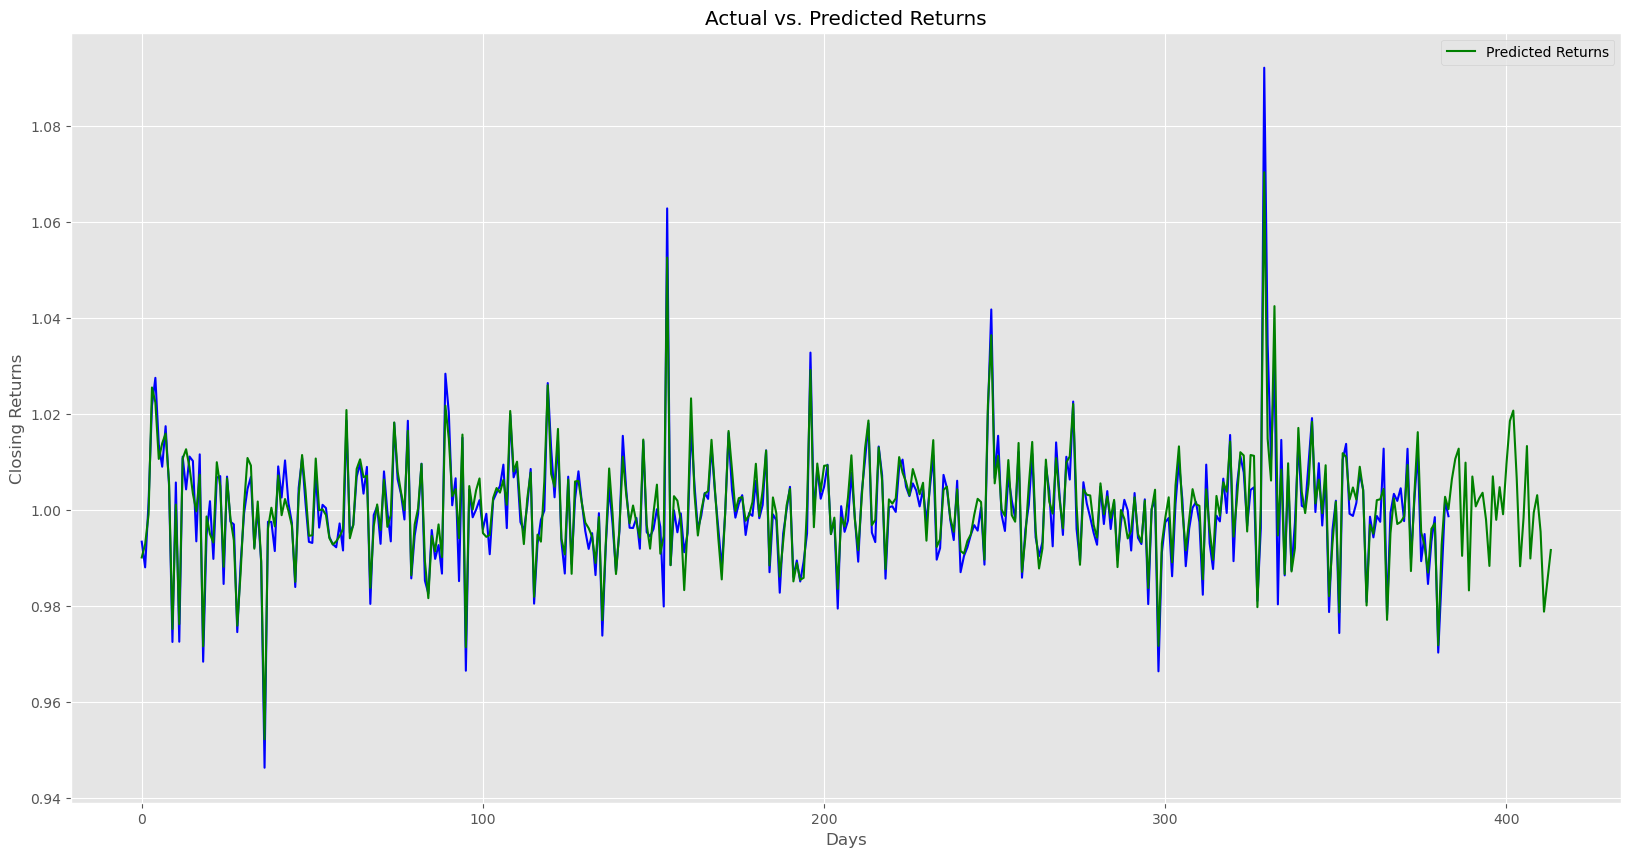

In [113]:
## Plotting the predictions
plt.figure(figsize= (20,10))
plt.plot(returnss, color= 'blue' )
plt.plot(test_predict[:], color= 'green', label= 'Predicted Returns')

plt.xlabel('Days')
plt.ylabel('Closing Returns')
plt.title('Actual vs. Predicted Returns')
plt.legend()

In [114]:
### Performance Accuracy Evaluation
print('rmse=', math.sqrt(mean_squared_error(returnss, test_predict[:len(test_predict)-30])))

rmse= 0.003636032556448938


In [117]:
np.mean(forecasted)

1.0007514

In [116]:
## 30 Days Predictions 
forecasted= test_predict[len(test_predict)-30:]
print(forecasted)

[[1.0064367 ]
 [1.010691  ]
 [1.0128183 ]
 [0.9904898 ]
 [1.0098976 ]
 [0.98329467]
 [1.0070114 ]
 [1.0007882 ]
 [1.0024487 ]
 [1.0036292 ]
 [0.9980863 ]
 [0.9883879 ]
 [1.0070428 ]
 [0.99799097]
 [1.0047972 ]
 [0.9991495 ]
 [1.0096118 ]
 [1.0185775 ]
 [1.020736  ]
 [1.0066984 ]
 [0.98832643]
 [0.9983651 ]
 [1.0133559 ]
 [0.9899369 ]
 [0.999501  ]
 [1.0031217 ]
 [0.99551576]
 [0.97887576]
 [0.98525065]
 [0.99170756]]
